# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
customers=pd.read_csv("Ecommerce Customers.csv")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


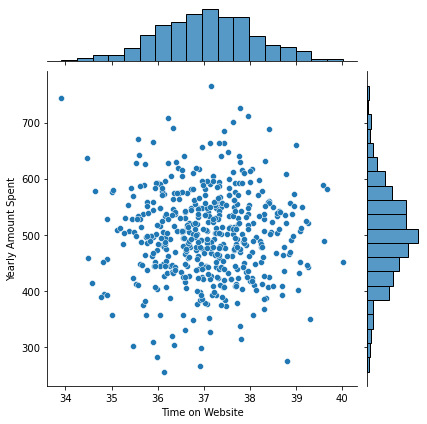

In [7]:
sns.jointplot("Time on Website","Yearly Amount Spent",data=customers)

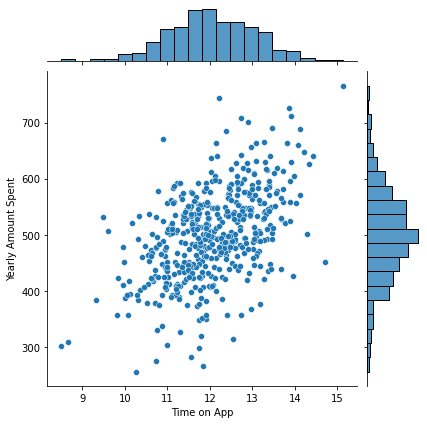

In [9]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=customers)

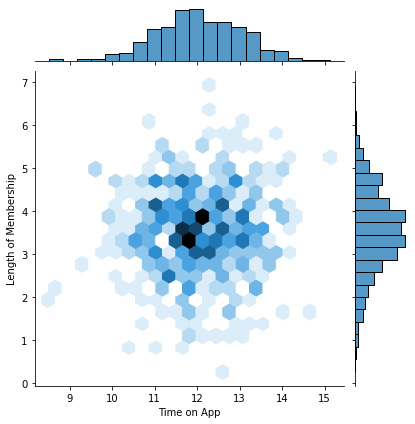

In [10]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,kind='hex')

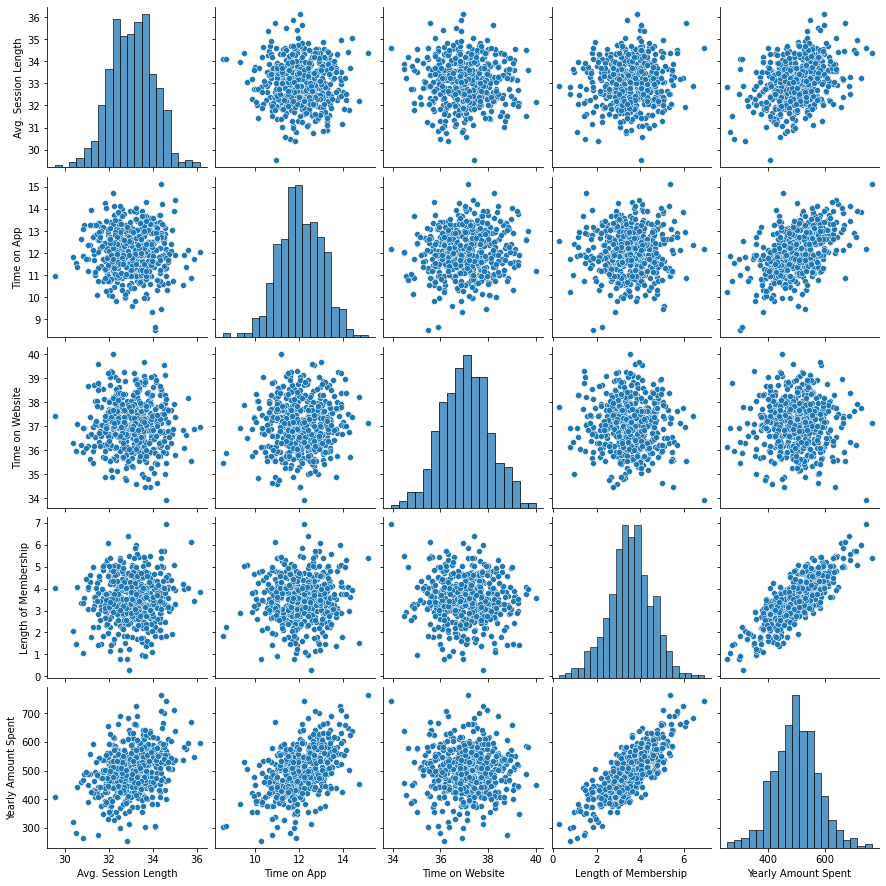

In [11]:
sns.pairplot(data=customers)

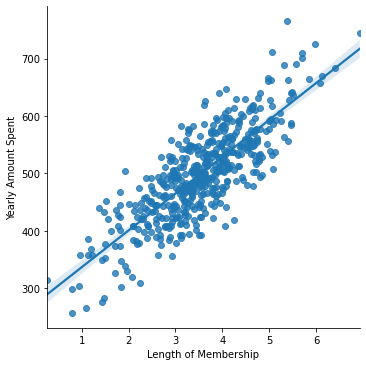

In [13]:
sns.lmplot(y='Yearly Amount Spent',x='Length of Membership',data=customers)

In [15]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
X=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
cust=LinearRegression()

In [24]:
cust.fit(X_train,y_train)

LinearRegression()

In [26]:
cust.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [28]:
prediction=cust.predict(X_test)

Text(0, 0.5, 'Predicted Values')

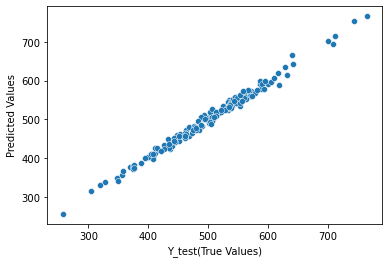

In [31]:
sns.scatterplot(x=y_test,y=prediction)
plt.xlabel("Y_test(True Values)")
plt.ylabel("Predicted Values")

In [34]:
from sklearn import metrics

In [37]:
metrics.mean_absolute_error(y_test,prediction)

7.228148653430855

In [36]:
metrics.mean_squared_error(y_test,prediction)

79.81305165097481

In [38]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

8.933815066978655

In [39]:
metrics.explained_variance_score(y_test,prediction)

0.9890771231889607

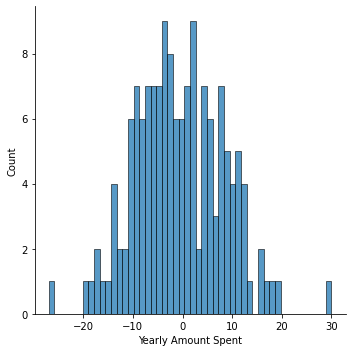

In [43]:
sns.displot(y_test-prediction,bins=50)

In [44]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [49]:
pd.DataFrame(cust.coef_,index=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'],columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Logistic Regression

In [50]:
ad_data=pd.read_csv("advertising.csv")

In [51]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [52]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [53]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:xlabel='Age', ylabel='Count'>

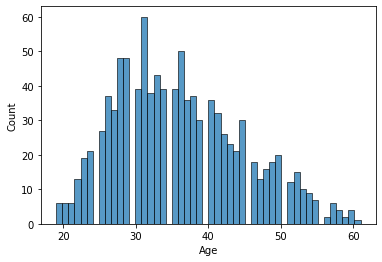

In [59]:
sns.histplot(ad_data['Age'],bins=50)

# ad_data['Age'].plot.hist(bins=50)

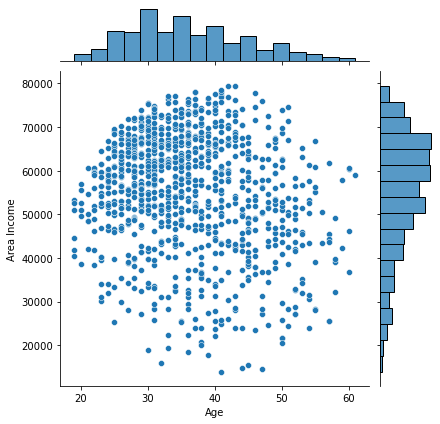

In [61]:
sns.jointplot(y='Area Income',x="Age",data=ad_data)

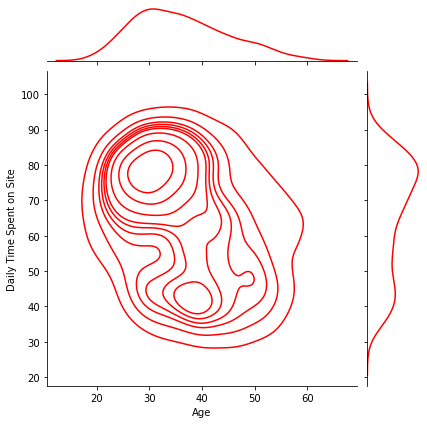

In [70]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red')

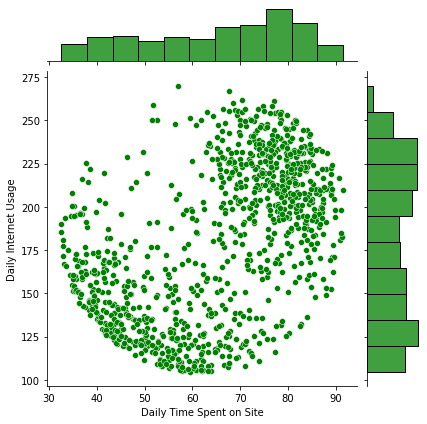

In [74]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

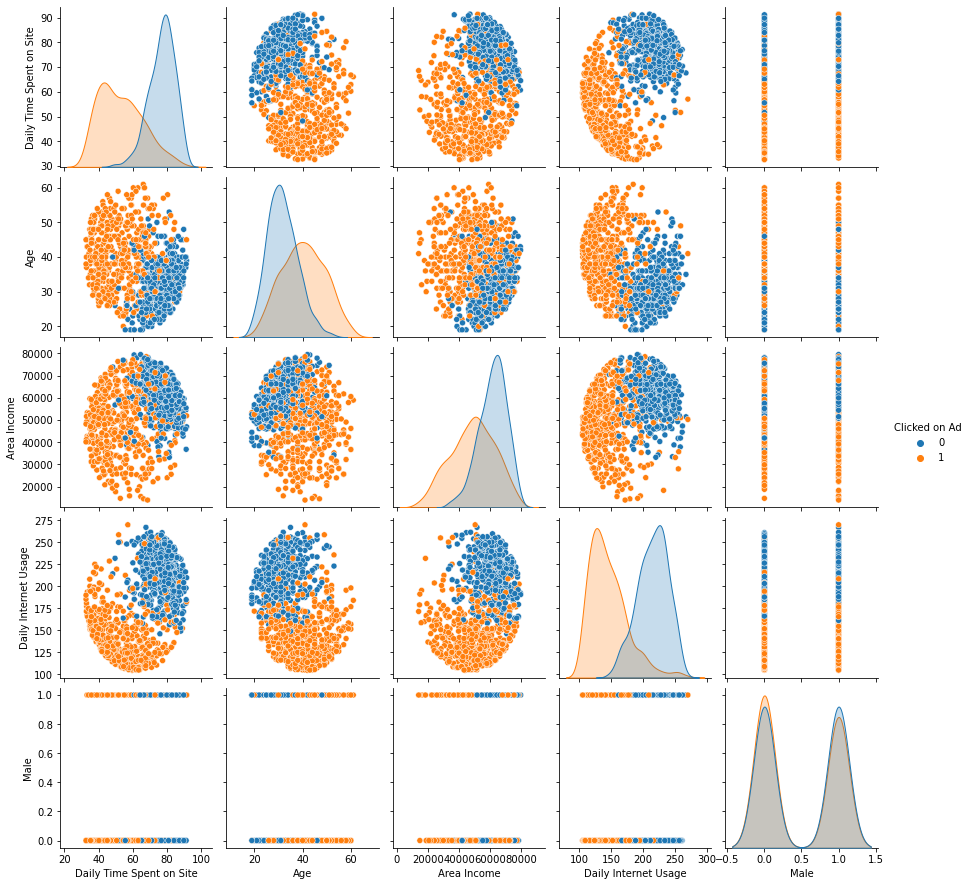

In [76]:
sns.pairplot(ad_data,hue='Clicked on Ad')

In [79]:
X=ad_data.drop(['Clicked on Ad','City','Country','Timestamp','Ad Topic Line'],axis=1)
y=ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr=LogisticRegression()

In [82]:
lr.fit(X_train,y_train)

LogisticRegression()

In [84]:
prediction=lr.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [93]:
confusion_matrix(y_test,prediction)

array([[149,   8],
       [ 14, 129]], dtype=int64)